De datasets voor deze code zijn uit de slides gekopieerd en geplakt in een Excel bestand, en dan tijdelijk weer gekopieerd naar je klemboord en dan ingelezen via pd.read_clipboard. Dus moet je ook zo doen als je de datasets zelf willen verwerken

In [1]:
# Basis imports
import pandas as pd
import numpy as np

### Dataset 1: Drukte op de Luchthaven

In [2]:
# Lees de dataset in via een kopie van de slides naar een Excel sheet (Blad 1) 
df1 = pd.read_clipboard()
df1

,Vliegtuig ID,Aankomst,Vertrek
0,1,09:00,11:30
1,2,10:00,12:00
2,3,10:00,11:30
3,4,11:00,15:00
4,5,11:15,13:30
5,6,12:00,13:30
6,7,13:00,14:30


In [3]:
# Check de type van de tijdwaardes (ze zijn objects, niet timestamps)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Vliegtuig ID  7 non-null      int64 
 1   Aankomst      7 non-null      object
 2   Vertrek       7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [4]:
# Converteer de tijdwaardes naar timestamps
df1['Aankomst'] = pd.to_datetime(df1['Aankomst'], format = '%H:%M')
df1['Vertrek']  = pd.to_datetime(df1['Vertrek'],  format = '%H:%M')
df1

,Vliegtuig ID,Aankomst,Vertrek
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00
1,2,1900-01-01 10:00:00,1900-01-01 12:00:00
2,3,1900-01-01 10:00:00,1900-01-01 11:30:00
3,4,1900-01-01 11:00:00,1900-01-01 15:00:00
4,5,1900-01-01 11:15:00,1900-01-01 13:30:00
5,6,1900-01-01 12:00:00,1900-01-01 13:30:00
6,7,1900-01-01 13:00:00,1900-01-01 14:30:00


In [5]:
# Check de output van date_range() voor rij 0
pd.date_range(start = df1['Aankomst'][0], end = df1['Vertrek'][0], freq = '15min' )

DatetimeIndex(['1900-01-01 09:00:00', '1900-01-01 09:15:00',
               '1900-01-01 09:30:00', '1900-01-01 09:45:00',
               '1900-01-01 10:00:00', '1900-01-01 10:15:00',
               '1900-01-01 10:30:00', '1900-01-01 10:45:00',
               '1900-01-01 11:00:00', '1900-01-01 11:15:00',
               '1900-01-01 11:30:00'],
              dtype='datetime64[ns]', freq='15T')

In [6]:
# Creer nieuwe kolom voor een lijst van alle geldige kwartiertjes per vliegtuig
df1['Kwartier'] = df1.apply(lambda rij: list(pd.date_range(start=rij['Aankomst'], end=rij['Vertrek'], freq='15min')), axis=1)
df1

,Vliegtuig ID,Aankomst,Vertrek,Kwartier
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,"[1900-01-01 09:00:00, 1900-01-01 09:15:00, 190..."
1,2,1900-01-01 10:00:00,1900-01-01 12:00:00,"[1900-01-01 10:00:00, 1900-01-01 10:15:00, 190..."
2,3,1900-01-01 10:00:00,1900-01-01 11:30:00,"[1900-01-01 10:00:00, 1900-01-01 10:15:00, 190..."
3,4,1900-01-01 11:00:00,1900-01-01 15:00:00,"[1900-01-01 11:00:00, 1900-01-01 11:15:00, 190..."
4,5,1900-01-01 11:15:00,1900-01-01 13:30:00,"[1900-01-01 11:15:00, 1900-01-01 11:30:00, 190..."
5,6,1900-01-01 12:00:00,1900-01-01 13:30:00,"[1900-01-01 12:00:00, 1900-01-01 12:15:00, 190..."
6,7,1900-01-01 13:00:00,1900-01-01 14:30:00,"[1900-01-01 13:00:00, 1900-01-01 13:15:00, 190..."


In [7]:
# Voorbeeld van explode
df1.explode('Kwartier').head(15)

,Vliegtuig ID,Aankomst,Vertrek,Kwartier
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 09:00:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 09:15:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 09:30:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 09:45:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 10:00:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 10:15:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 10:30:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 10:45:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 11:00:00
0,1,1900-01-01 09:00:00,1900-01-01 11:30:00,1900-01-01 11:15:00


<AxesSubplot:xlabel='Kwartier'>

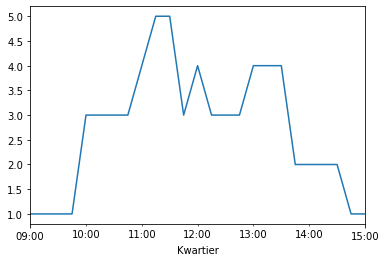

In [8]:
# Plot hoe druk het vliegveld op bepaalde kwartiertjes wordt
# Voor explode uitleg, kijk pandas documentatie
df1.explode('Kwartier').groupby('Kwartier')['Vliegtuig ID'].nunique().plot(style = '-')

### Dataset 2: Drukte in Gebouwen obv Pasjes Scandata

In [9]:
# Lees de dataset in via een kopie van de slides naar een Excel sheet (Blad 2)
df2 = pd.read_clipboard()
df2

,time,inStudent,inEmployee,outStudent,outEmployee
0,21-9-2020 07:00,0.0,1.0,0.0,0.0
1,21-9-2020 08:00,13.0,4.0,0.0,2.0
2,21-9-2020 09:00,120.0,30.0,4.0,4.0
3,21-9-2020 10:00,119.0,25.0,33.0,10.0
4,21-9-2020 11:00,172.0,21.0,64.0,13.0
5,21-9-2020 12:00,275.0,29.0,115.0,23.0
6,21-9-2020 13:00,201.0,20.0,129.0,14.0
7,21-9-2020 14:00,233.0,26.0,167.0,13.0
8,21-9-2020 15:00,147.0,23.0,203.0,22.0
9,21-9-2020 16:00,73.0,14.0,136.0,18.0


In [10]:
# Check de type van de tijdwaardes (ze zijn objects, niet timestamps)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         15 non-null     object 
 1   inStudent    15 non-null     float64
 2   inEmployee   15 non-null     float64
 3   outStudent   15 non-null     float64
 4   outEmployee  15 non-null     float64
dtypes: float64(4), object(1)
memory usage: 728.0+ bytes


In [11]:
# Converteer de tijdwaardes naar timestamps
df2['time'] = pd.to_datetime(df2['time'])
df2

,time,inStudent,inEmployee,outStudent,outEmployee
0,2020-09-21 07:00:00,0.0,1.0,0.0,0.0
1,2020-09-21 08:00:00,13.0,4.0,0.0,2.0
2,2020-09-21 09:00:00,120.0,30.0,4.0,4.0
3,2020-09-21 10:00:00,119.0,25.0,33.0,10.0
4,2020-09-21 11:00:00,172.0,21.0,64.0,13.0
5,2020-09-21 12:00:00,275.0,29.0,115.0,23.0
6,2020-09-21 13:00:00,201.0,20.0,129.0,14.0
7,2020-09-21 14:00:00,233.0,26.0,167.0,13.0
8,2020-09-21 15:00:00,147.0,23.0,203.0,22.0
9,2020-09-21 16:00:00,73.0,14.0,136.0,18.0


In [12]:
# Controleer dat dit is gelukt
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         15 non-null     datetime64[ns]
 1   inStudent    15 non-null     float64       
 2   inEmployee   15 non-null     float64       
 3   outStudent   15 non-null     float64       
 4   outEmployee  15 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 728.0 bytes


In [13]:
# Converteer de getallen naar gehele getallen (integers)
df2.iloc[:, 1:] = df2.iloc[:, 1:].astype(int)

df2

# Kan ook met de volgende als je wilt dat alles niet afgerond naar beneden wordt
# df2.iloc[:, 1:] = df2.iloc[:, 1:].round().astype(int)

,time,inStudent,inEmployee,outStudent,outEmployee
0,2020-09-21 07:00:00,0,1,0,0
1,2020-09-21 08:00:00,13,4,0,2
2,2020-09-21 09:00:00,120,30,4,4
3,2020-09-21 10:00:00,119,25,33,10
4,2020-09-21 11:00:00,172,21,64,13
5,2020-09-21 12:00:00,275,29,115,23
6,2020-09-21 13:00:00,201,20,129,14
7,2020-09-21 14:00:00,233,26,167,13
8,2020-09-21 15:00:00,147,23,203,22
9,2020-09-21 16:00:00,73,14,136,18


In [14]:
# Bereken hoeveel mensen in totaal er in het gebouw op een bepaald tijdstip zijn
df2['totaal_in_gebouw'] = (df2['inStudent'].cumsum() + df2['inEmployee'].cumsum()
        - df2['outStudent'].cumsum() - df2['outEmployee'].cumsum())
df2

,time,inStudent,inEmployee,outStudent,outEmployee,totaal_in_gebouw
0,2020-09-21 07:00:00,0,1,0,0,1
1,2020-09-21 08:00:00,13,4,0,2,16
2,2020-09-21 09:00:00,120,30,4,4,158
3,2020-09-21 10:00:00,119,25,33,10,259
4,2020-09-21 11:00:00,172,21,64,13,375
5,2020-09-21 12:00:00,275,29,115,23,541
6,2020-09-21 13:00:00,201,20,129,14,619
7,2020-09-21 14:00:00,233,26,167,13,698
8,2020-09-21 15:00:00,147,23,203,22,643
9,2020-09-21 16:00:00,73,14,136,18,576


<AxesSubplot:xlabel='time'>

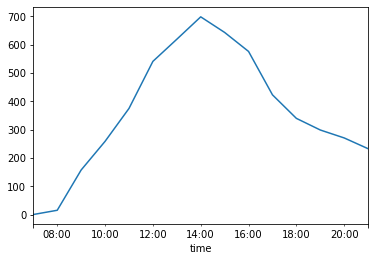

In [17]:
# Plot traject van 'totaal_in_gebouw' via set_index()
df2.set_index('time')['totaal_in_gebouw'].plot(style = '-')

### Dataset 3: HR Analytics, Inzichten in Teams

In [24]:
# Lees de dataset in via een kopie van de slides naar een Excel sheet (Blad 3)
df3 = pd.read_clipboard()
df3

,Naam,Functie,Leidinggevende,Leeftijd,Geslacht
0,Danny Bowman,Communication specialist,Brahim West,35,Man
1,Mariëtte Boaz,Intern,Brahim West,19,Vrouw
2,Kyra Thompson,Data engineer,Brahim West,32,Vrouw
3,Nicole Davies,Designer,Brahim West,45,Vrouw
4,Kaila Van Assen,Accountant,Bridget Erkens,26,NaN
5,Thana Mata,Accountant,Bridget Erkens,31,Non-binary
6,Haven Van Oorschot,Accountant,Bridget Erkens,40,Man
7,Brahim West,Chief web department,Alonzo Hogarth,39,Man
8,Bridget Erkens,Lead accountant,Alonzo Hogarth,51,Vrouw
9,Alejo Aston,Manager operations,Alonzo Hogarth,42,NaN


In [19]:
# Controleer de unieken leidinggevenden (valt er iets op?)
df3['Leidinggevende'].unique()

array(['Brahim\xa0West', 'Brahim West', 'Bridget\xa0Erkens',
       'Alonzo\xa0Hogarth', nan], dtype=object)

De \xa0 betekent een non-breaking space (een soort spatie die voorkomt dat woorden aan elkaar worden vastgeplakt),
die soms voorkomt bij kopiëren en plakken van tekst uit websites of documenten

In [25]:
# Haal een 'Brahim West' zonder een verborgen \xa0 uit
df3['Leidinggevende'] = np.where(df3['Leidinggevende'] == 'Brahim West', 'Brahim\xa0West', df3['Leidinggevende'] )
df3['Leidinggevende'].unique()

array(['Brahim\xa0West', 'Bridget\xa0Erkens', 'Alonzo\xa0Hogarth', nan],
      dtype=object)

In [27]:
# Gebruik groupby() en transform('size') te zien hoe groot elk team is
# Let op: Int64 gebruikt om de NaN's in de berekening te brengen (anders krijg je een foutmelding)
df3['Team_Size'] = df3.groupby('Leidinggevende')['Naam'].transform('size').astype('Int64')

# Maar werkt niet met .nunique()
df3['Team_Size_Test'] = df3.groupby('Leidinggevende')['Naam'].nunique()
df3

,Naam,Functie,Leidinggevende,Leeftijd,Geslacht,Team_Size,Team_Size_Test
0,Danny Bowman,Communication specialist,Brahim West,35,Man,4,NaN
1,Mariëtte Boaz,Intern,Brahim West,19,Vrouw,4,NaN
2,Kyra Thompson,Data engineer,Brahim West,32,Vrouw,4,NaN
3,Nicole Davies,Designer,Brahim West,45,Vrouw,4,NaN
4,Kaila Van Assen,Accountant,Bridget Erkens,26,NaN,3,NaN
5,Thana Mata,Accountant,Bridget Erkens,31,Non-binary,3,NaN
6,Haven Van Oorschot,Accountant,Bridget Erkens,40,Man,3,NaN
7,Brahim West,Chief web department,Alonzo Hogarth,39,Man,3,NaN
8,Bridget Erkens,Lead accountant,Alonzo Hogarth,51,Vrouw,3,NaN
9,Alejo Aston,Manager operations,Alonzo Hogarth,42,NaN,3,NaN


In [28]:
# Haal Team_Size_Test uit de DataFrame
df3.drop('Team_Size_Test',axis=1,inplace=True)
df3

,Naam,Functie,Leidinggevende,Leeftijd,Geslacht,Team_Size
0,Danny Bowman,Communication specialist,Brahim West,35,Man,4
1,Mariëtte Boaz,Intern,Brahim West,19,Vrouw,4
2,Kyra Thompson,Data engineer,Brahim West,32,Vrouw,4
3,Nicole Davies,Designer,Brahim West,45,Vrouw,4
4,Kaila Van Assen,Accountant,Bridget Erkens,26,NaN,3
5,Thana Mata,Accountant,Bridget Erkens,31,Non-binary,3
6,Haven Van Oorschot,Accountant,Bridget Erkens,40,Man,3
7,Brahim West,Chief web department,Alonzo Hogarth,39,Man,3
8,Bridget Erkens,Lead accountant,Alonzo Hogarth,51,Vrouw,3
9,Alejo Aston,Manager operations,Alonzo Hogarth,42,NaN,3


In [31]:
# Doe hetzelfde maar deze keer voor gemiddelde leeftijd per team
df3['Team_Leeftijd_Gem'] = df3.groupby('Leidinggevende')['Leeftijd'].transform('mean').round(2)
df3

,Naam,Functie,Leidinggevende,Leeftijd,Geslacht,Team_Size,Team_Leeftijd_Gem
0,Danny Bowman,Communication specialist,Brahim West,35,Man,4,32.75
1,Mariëtte Boaz,Intern,Brahim West,19,Vrouw,4,32.75
2,Kyra Thompson,Data engineer,Brahim West,32,Vrouw,4,32.75
3,Nicole Davies,Designer,Brahim West,45,Vrouw,4,32.75
4,Kaila Van Assen,Accountant,Bridget Erkens,26,NaN,3,32.33
5,Thana Mata,Accountant,Bridget Erkens,31,Non-binary,3,32.33
6,Haven Van Oorschot,Accountant,Bridget Erkens,40,Man,3,32.33
7,Brahim West,Chief web department,Alonzo Hogarth,39,Man,3,44.00
8,Bridget Erkens,Lead accountant,Alonzo Hogarth,51,Vrouw,3,44.00
9,Alejo Aston,Manager operations,Alonzo Hogarth,42,NaN,3,44.00


In [32]:
# Doe hetzelfde maar deze keer voor standaardafwijking per team
df3['Team_Leeftijd_Spreiding'] = df3.groupby('Leidinggevende')['Leeftijd'].transform('std').round(2)
df3

,Naam,Functie,Leidinggevende,Leeftijd,Geslacht,Team_Size,Team_Leeftijd_Gem,Team_Leeftijd_Spreiding
0,Danny Bowman,Communication specialist,Brahim West,35,Man,4,32.75,10.72
1,Mariëtte Boaz,Intern,Brahim West,19,Vrouw,4,32.75,10.72
2,Kyra Thompson,Data engineer,Brahim West,32,Vrouw,4,32.75,10.72
3,Nicole Davies,Designer,Brahim West,45,Vrouw,4,32.75,10.72
4,Kaila Van Assen,Accountant,Bridget Erkens,26,NaN,3,32.33,7.09
5,Thana Mata,Accountant,Bridget Erkens,31,Non-binary,3,32.33,7.09
6,Haven Van Oorschot,Accountant,Bridget Erkens,40,Man,3,32.33,7.09
7,Brahim West,Chief web department,Alonzo Hogarth,39,Man,3,44.00,6.24
8,Bridget Erkens,Lead accountant,Alonzo Hogarth,51,Vrouw,3,44.00,6.24
9,Alejo Aston,Manager operations,Alonzo Hogarth,42,NaN,3,44.00,6.24


### Dataset 4: Data van Laadpalen in Amsterdam

In [33]:
# Lees de dataset in via een kopie van de slides naar een Excel sheet (Blad 4)
df4 = pd.read_clipboard()
df4

,Transaction_ID,ChargePoint_ID,Socket_ID,TimeStamp,MeterValue
0,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 01:30,14944500
1,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 01:30,14944500
2,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 01:45,14946930
3,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 01:45,14946960
4,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 02:00,14949120
5,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 02:00,14949130
6,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 02:15,14950560
7,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 02:15,14950570
8,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,3-1-2019 02:30,14951030
9,3262038,9bae10789a789973cc7f05d2a96df76f,2,3-1-2019 11:36,5394520


In [34]:
# Check de type van de tijdwaardes (ze zijn objects, niet timestamps)
print(df4.info())

# Check het aantal unieke waardes per kolom
df4.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction_ID  20 non-null     int64 
 1   ChargePoint_ID  20 non-null     object
 2   Socket_ID       20 non-null     int64 
 3   TimeStamp       20 non-null     object
 4   MeterValue      20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes
None


Transaction_ID     2
ChargePoint_ID     2
Socket_ID          2
TimeStamp         15
MeterValue        18
dtype: int64

In [36]:
# Converteer de tijdwaardes naar timestamps
df4['TimeStamp'] = pd.to_datetime(df4['TimeStamp'])
df4
# df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  20 non-null     int64         
 1   ChargePoint_ID  20 non-null     object        
 2   Socket_ID       20 non-null     int64         
 3   TimeStamp       20 non-null     datetime64[ns]
 4   MeterValue      20 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 928.0+ bytes


In [37]:
# Het lijkt erop dat we duplicaten in de dataset hebben...
print(df4.shape)
print(df4.drop_duplicates().shape)

(20, 5)
(18, 5)


In [38]:
# Bewaar de versie zonder duplicaten
df4.drop_duplicates(inplace=True)
df4

,Transaction_ID,ChargePoint_ID,Socket_ID,TimeStamp,MeterValue
0,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:30:00,14944500
2,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:45:00,14946930
3,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:45:00,14946960
4,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:00:00,14949120
5,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:00:00,14949130
6,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:15:00,14950560
7,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:15:00,14950570
8,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:30:00,14951030
9,3262038,9bae10789a789973cc7f05d2a96df76f,2,2019-03-01 11:36:00,5394520
11,3262038,9bae10789a789973cc7f05d2a96df76f,2,2019-03-01 11:51:00,5395410


In [39]:
# Maak nieuwe kolommen voor tijd/meting verschillen
df4['TimeStamp_Diff']  = df4.groupby('ChargePoint_ID')['TimeStamp'].diff()
df4['MeterValue_Diff'] = df4.groupby('ChargePoint_ID')['MeterValue'].diff()
df4

,Transaction_ID,ChargePoint_ID,Socket_ID,TimeStamp,MeterValue,TimeStamp_Diff,MeterValue_Diff
0,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:30:00,14944500,NaT,NaN
2,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:45:00,14946930,0 days 00:15:00,2430.0
3,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:45:00,14946960,0 days 00:00:00,30.0
4,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:00:00,14949120,0 days 00:15:00,2160.0
5,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:00:00,14949130,0 days 00:00:00,10.0
6,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:15:00,14950560,0 days 00:15:00,1430.0
7,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:15:00,14950570,0 days 00:00:00,10.0
8,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:30:00,14951030,0 days 00:15:00,460.0
9,3262038,9bae10789a789973cc7f05d2a96df76f,2,2019-03-01 11:36:00,5394520,NaT,NaN
11,3262038,9bae10789a789973cc7f05d2a96df76f,2,2019-03-01 11:51:00,5395410,0 days 00:15:00,890.0


In [40]:
# Converteer Time_Stamp_Diff naar totaal aantal seconden
df4['TimeStamp_Diff'] = df4['TimeStamp_Diff'].apply(lambda x: x.total_seconds())
df4

,Transaction_ID,ChargePoint_ID,Socket_ID,TimeStamp,MeterValue,TimeStamp_Diff,MeterValue_Diff
0,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:30:00,14944500,NaN,NaN
2,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:45:00,14946930,900.0,2430.0
3,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:45:00,14946960,0.0,30.0
4,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:00:00,14949120,900.0,2160.0
5,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:00:00,14949130,0.0,10.0
6,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:15:00,14950560,900.0,1430.0
7,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:15:00,14950570,0.0,10.0
8,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:30:00,14951030,900.0,460.0
9,3262038,9bae10789a789973cc7f05d2a96df76f,2,2019-03-01 11:36:00,5394520,NaN,NaN
11,3262038,9bae10789a789973cc7f05d2a96df76f,2,2019-03-01 11:51:00,5395410,900.0,890.0


In [41]:
# Bereken nieuwe kolom (Vermogen) van MeterValue per 1000 per uur 
df4['Vermogen'] = (df4['MeterValue_Diff'] / 1000) / (df4['TimeStamp_Diff'] / 3600)
df4

,Transaction_ID,ChargePoint_ID,Socket_ID,TimeStamp,MeterValue,TimeStamp_Diff,MeterValue_Diff,Vermogen
0,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:30:00,14944500,NaN,NaN,NaN
2,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:45:00,14946930,900.0,2430.0,9.72
3,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 01:45:00,14946960,0.0,30.0,inf
4,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:00:00,14949120,900.0,2160.0,8.64
5,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:00:00,14949130,0.0,10.0,inf
6,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:15:00,14950560,900.0,1430.0,5.72
7,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:15:00,14950570,0.0,10.0,inf
8,3261657,e62c50d1be0a2f80ec51d471f9630a4e,1,2019-03-01 02:30:00,14951030,900.0,460.0,1.84
9,3262038,9bae10789a789973cc7f05d2a96df76f,2,2019-03-01 11:36:00,5394520,NaN,NaN,NaN
11,3262038,9bae10789a789973cc7f05d2a96df76f,2,2019-03-01 11:51:00,5395410,900.0,890.0,3.56


<AxesSubplot:>

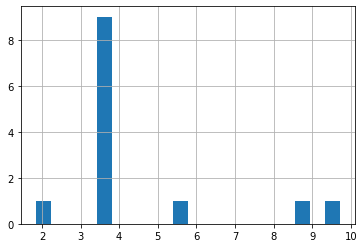

In [42]:
# Maak een histogram van vermogen, excl. NaN's en oneindige waarden
df4['Vermogen'].dropna().loc[lambda x: x < 100000000].hist(bins=20)

In [ ]:
# df.apply(lambda col: str(col), axis = 0)